# Homework 8
## Nicholas Colonna
### "I pledge my honor that I have abided by the Stevens Honor System."

In [24]:
import pandas as pd
import numpy as np
import pylab as pl
import statsmodels as sm
from sklearn import tree, metrics
from sklearn import model_selection
import matplotlib.pyplot as plt
import math
import statistics as stat
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

yields = pd.read_csv("./yields2009.csv")
returns = pd.read_csv("./midCapD.ts.csv")

print(yields.head())
print(returns.head())

       Date  1 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  20 yr  \
0  1/2/2009  0.04  0.08  0.28  0.40  0.88  1.14  1.72  2.07   2.46   3.22   
1  1/5/2009  0.05  0.14  0.32  0.43  0.78  1.08  1.67  2.07   2.49   3.37   
2  1/6/2009  0.05  0.14  0.31  0.45  0.80  1.10  1.68  2.07   2.51   3.41   
3  1/7/2009  0.03  0.11  0.29  0.44  0.82  1.15  1.66  2.02   2.52   3.41   
4  1/8/2009  0.04  0.09  0.28  0.44  0.83  1.16  1.60  1.95   2.47   3.40   

   30 yr  
0   2.83  
1   3.00  
2   3.04  
3   3.05  
4   3.04  
    X.Y..m..d      LSCC      CSGS        EC       NYB      ALTR       APH  \
0  2000-01-03  0.031167  0.051724 -0.019868 -0.009217  0.058008  0.010329   
1  2000-01-04 -0.075241 -0.023845 -0.050676 -0.032558 -0.050060 -0.034387   
2  2000-01-05 -0.025730 -0.003053  0.021352 -0.002404 -0.011292 -0.022137   
3  2000-01-06 -0.049251 -0.050536  0.027875  0.002410 -0.025381 -0.027559   
4  2000-01-07  0.041291 -0.008065  0.013559  0.002404  0.104167  0.010121   

        

1) Perform a principal components (PC) analysis with the minimum number of principal components to capture at least 95% of the variability.

As you can see, I performed PCA with an increasing number of components for each dataset until the sum of explained variance surpassed the threshold of 95%. 

In [25]:
#Yields data
x_y = yields.drop(['Date'], axis=1)
x_y = StandardScaler().fit_transform(x_y)

pca_y = PCA(n_components=1)
principalComponents_y = pca_y.fit(x_y).components_
help_y = {'PC #1':principalComponents_y[0]}
principalDf_y = pd.DataFrame(data = help_y)
variability_y = pca_y.explained_variance_ratio_
print('1 Principal Component')
print('Explained Variance of Each PC:', variability_y)
print('Sum of Variability:', sum(variability_y))
print()

pca_y = PCA(n_components=2)
principalComponents_y = pca_y.fit(x_y).components_
help_y = {'PC #1':principalComponents_y[0], 'PC #2':principalComponents_y[1]}
principalDf_y = pd.DataFrame(data = help_y)
variability_y = pca_y.explained_variance_ratio_
print('2 Principal Components')
print('Explained Variance of Each PC:', variability_y)
print('Sum of Variability:', sum(variability_y))
print()

pca_y = PCA(n_components=3)
principalComponents_y = pca_y.fit(x_y).components_
help_y = {'PC #1':principalComponents_y[0], 'PC #2':principalComponents_y[1],'PC #3':principalComponents_y[2]}
principalDf_y = pd.DataFrame(data = help_y)
variability_y = pca_y.explained_variance_ratio_
print('3 Principal Components')
print('Explained Variance of Each PC:', variability_y)
print('Sum of Variability:', sum(variability_y))

1 Principal Component
Explained Variance of Each PC: [0.57984357]
Sum of Variability: 0.5798435665819065

2 Principal Components
Explained Variance of Each PC: [0.57984357 0.32797814]
Sum of Variability: 0.9078217072930992

3 Principal Components
Explained Variance of Each PC: [0.57984357 0.32797814 0.05596134]
Sum of Variability: 0.963783048024727


In [26]:
#Returns data
x_r = returns.drop(['X.Y..m..d'], axis=1)
x_r = StandardScaler().fit_transform(x_r)

pca_r = PCA(n_components=1)
principalComponents_r = pca_r.fit(x_r).components_
help_r = {'PC #1':principalComponents_r[0]}
principalDf_r = pd.DataFrame(data = help_r)
variability_r = pca_r.explained_variance_ratio_
print('1 Principal Component')
print('Explained Variance of Each PC:', variability_r)
print('Sum of Variability:', sum(variability_r))
print()

pca_r = PCA(n_components=2)
principalComponents_r = pca_r.fit(x_r).components_
help_r = {'PC #1':principalComponents_r[0], 'PC #2':principalComponents_r[1]}
principalDf_r = pd.DataFrame(data = help_r)
variability_r = pca_r.explained_variance_ratio_
print('2 Principal Components')
print('Explained Variance of Each PC:', variability_r)
print('Sum of Variability:', sum(variability_r))
print()

print('...')
print('...')
print()

pca_r = PCA(n_components=17)
principalComponents_r = pca_r.fit(x_r).components_
help_r = {'PC #1':principalComponents_r[0], 'PC #2':principalComponents_r[1], 'PC #3':principalComponents_r[2], 'PC #4':principalComponents_r[3], 'PC #5':principalComponents_r[4], 'PC #6':principalComponents_r[5], 'PC #7':principalComponents_r[6], 'PC #8':principalComponents_r[7], 'PC #9':principalComponents_r[8], 'PC #10':principalComponents_r[9], 'PC #11':principalComponents_r[10], 'PC #12':principalComponents_r[11], 'PC #13':principalComponents_r[12], 'PC #14':principalComponents_r[13], 'PC #15':principalComponents_r[14], 'PC #16':principalComponents_r[15], 'PC #17':principalComponents_r[16]}
principalDf_r = pd.DataFrame(data = help_r)
variability_r = pca_r.explained_variance_ratio_
print('17 Principal Components')
print('Explained Variance of Each PC:', variability_r)
print('Sum of Variability:', sum(variability_r))
print()

pca_r = PCA(n_components=18)
principalComponents_r = pca_r.fit(x_r).components_
help_r = {'PC #1':principalComponents_r[0], 'PC #2':principalComponents_r[1], 'PC #3':principalComponents_r[2], 'PC #4':principalComponents_r[3], 'PC #5':principalComponents_r[4], 'PC #6':principalComponents_r[5], 'PC #7':principalComponents_r[6], 'PC #8':principalComponents_r[7], 'PC #9':principalComponents_r[8], 'PC #10':principalComponents_r[9], 'PC #11':principalComponents_r[10], 'PC #12':principalComponents_r[11], 'PC #13':principalComponents_r[12], 'PC #14':principalComponents_r[13], 'PC #15':principalComponents_r[14], 'PC #16':principalComponents_r[15], 'PC #17':principalComponents_r[16], 'PC #18':principalComponents_r[17]}
principalDf_r = pd.DataFrame(data = help_r)
variability_r = pca_r.explained_variance_ratio_
print('18 Principal Components')
print('Explained Variance of Each PC:', variability_r)
print('Sum of Variability:', sum(variability_r))

1 Principal Component
Explained Variance of Each PC: [0.23701701]
Sum of Variability: 0.2370170106076889

2 Principal Components
Explained Variance of Each PC: [0.23701701 0.09867238]
Sum of Variability: 0.33568939414755206

...
...

17 Principal Components
Explained Variance of Each PC: [0.23701701 0.09867238 0.07112473 0.05548289 0.05297979 0.04912193
 0.04451265 0.04363128 0.04131031 0.04023251 0.036531   0.03451075
 0.030758   0.02995036 0.02759199 0.02559723 0.02291729]
Sum of Variability: 0.9419420932730358

18 Principal Components
Explained Variance of Each PC: [0.23701701 0.09867238 0.07112473 0.05548289 0.05297979 0.04912193
 0.04451265 0.04363128 0.04131031 0.04023251 0.036531   0.03451075
 0.030758   0.02995036 0.02759199 0.02559723 0.02291729 0.02078321]
Sum of Variability: 0.9627253040600474


2) How many PCs did you use to capture at least 95% of the variability of the dataset?

After performing PCA on the yields data, it was apparent that 3 principal components was the minimum number of components to capture at least 95% of the variablility (0.9638).

After performing PCA on the returns data, it was apparent that 18 principal components was the minimum number of components to capture at least 95% of the variablility (0.9627).

3) (1) Generate a scree plot (proportion variance explained (PVE) & PCs)


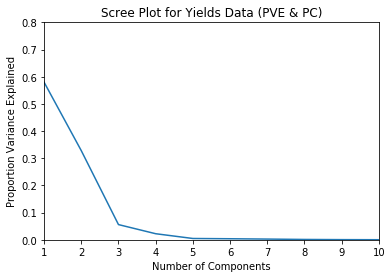

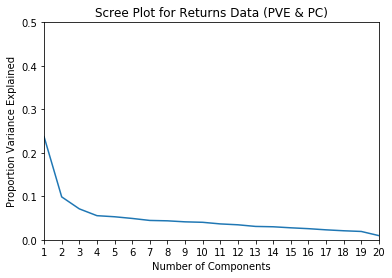

In [27]:
#yields
pca_y_plt = PCA(n_components=10)
principalComponents_y_plt = pca_y_plt.fit_transform(x_y)

plt.plot(np.arange(1, 11, 1), pca_y_plt.explained_variance_ratio_)
plt.ylim(0, 0.8)
plt.xlim(1, 10.0)
plt.xticks(np.arange(1, 11, step=1))
plt.xlabel('Number of Components')
plt.ylabel('Proportion Variance Explained')
plt.title('Scree Plot for Yields Data (PVE & PC)')
plt.show()

#returns
pca_r_plt = PCA(n_components=20)
principalComponents_r_plt = pca_r_plt.fit_transform(x_r)

plt.plot(np.arange(1, 21, 1), pca_r_plt.explained_variance_ratio_)
plt.ylim(0, 0.5)
plt.xlim(1, 20.0)
plt.xticks(np.arange(1, 21, step=1))
plt.xlabel('Number of Components')
plt.ylabel('Proportion Variance Explained')
plt.title('Scree Plot for Returns Data (PVE & PC)')
plt.show()

3) (2) Generate a plot with the cumulative PVE & PCs

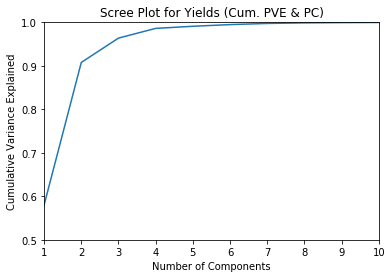

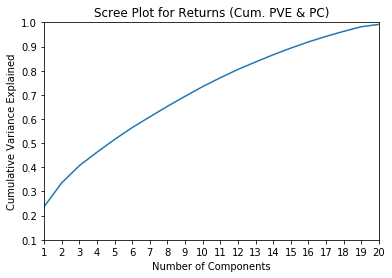

In [28]:
#yields
variances_y = list()
sum_y = 0
for i in pca_y_plt.explained_variance_ratio_:
    sum_y = i + sum_y
    variances_y.append(sum_y)

plt.plot(np.arange(1, 11, 1), variances_y)
plt.ylim(0.5, 1.0)
plt.xlim(1, 10.0)
plt.xticks(np.arange(1, 11, step=1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Scree Plot for Yields (Cum. PVE & PC)')
plt.show()

#returns
variances_r = list()
sum_r = 0
for i in pca_r_plt.explained_variance_ratio_:
    sum_r = i + sum_r
    variances_r.append(sum_r)

plt.plot(np.arange(1, 21, 1), variances_r)
plt.ylim(0.1, 1.0)
plt.xlim(1, 20.0)
plt.xticks(np.arange(1, 21, step=1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Scree Plot for Returns (Cum. PVE & PC)')
plt.show()

3) (3) Generate a scattered plot using the first two principal component loading vectors

principalDf is a dataframe that includes all of the principal component loading vectors. From there, I selected the first 2 principal components for each and displayed them.

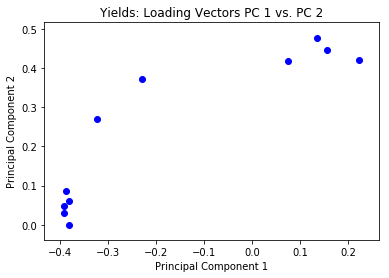

In [29]:
plt.scatter(principalDf_y['PC #1'], principalDf_y['PC #2'], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Yields: Loading Vectors PC 1 vs. PC 2')
plt.show()

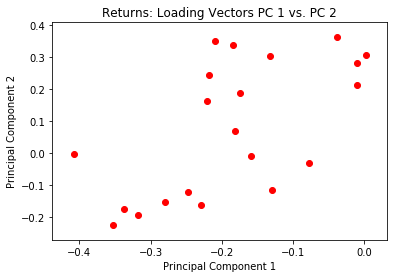

In [30]:
plt.scatter(principalDf_r['PC #1'], principalDf_r['PC #2'], c='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Returns: Loading Vectors PC 1 vs. PC 2')
plt.show()

3) (4) Generate a matrix or a dataframe with the scores of all the principal components

I created a dataframe with each principal component score and variable, then displayed them for each.

In [31]:
column_names_y = yields.columns.values[1:]
help_y = {'Variable':column_names_y, 'PC #1':principalComponents_y[0], 'PC #2':principalComponents_y[1], 'PC #3':principalComponents_y[2]}
principalDf_y = pd.DataFrame(data = help_y)
print('Yields Data Principal Component Scores:')
print()
print(principalDf_y)

Yields Data Principal Component Scores:

   Variable     PC #1     PC #2     PC #3
0      1 mo  0.074078  0.417214 -0.698759
1      3 mo  0.136357  0.477154 -0.189777
2      6 mo  0.223604  0.419466  0.088282
3      1 yr  0.156682  0.444420  0.256535
4      2 yr -0.229071  0.371408  0.458500
5      3 yr -0.323167  0.269460  0.277424
6      5 yr -0.386938  0.084998  0.040217
7      7 yr -0.390286  0.048910 -0.033046
8     10 yr -0.391910  0.030423 -0.124957
9     20 yr -0.379949  0.060832 -0.194951
10    30 yr -0.380082  0.000586 -0.242078


In [32]:
column_names_r = returns.columns.values[1:]
help_r = {'Variable':column_names_r, 'PC #1':principalComponents_r[0], 'PC #2':principalComponents_r[1], 'PC #3':principalComponents_r[2], 'PC #4':principalComponents_r[3], 'PC #5':principalComponents_r[4], 'PC #6':principalComponents_r[5], 'PC #7':principalComponents_r[6], 'PC #8':principalComponents_r[7], 'PC #9':principalComponents_r[8], 'PC #10':principalComponents_r[9], 'PC #11':principalComponents_r[10], 'PC #12':principalComponents_r[11], 'PC #13':principalComponents_r[12], 'PC #14':principalComponents_r[13], 'PC #15':principalComponents_r[14], 'PC #16':principalComponents_r[15], 'PC #17':principalComponents_r[16], 'PC #18':principalComponents_r[17]}
principalDf_r = pd.DataFrame(data = help_r)
print('Returns Data Principal Component Scores:')
print()
print(principalDf_r)

Returns Data Principal Component Scores:

   Variable     PC #1     PC #2     PC #3     PC #4     PC #5     PC #6  \
0      LSCC -0.352059 -0.225170 -0.074601 -0.104474  0.050782 -0.096271   
1      CSGS -0.128996 -0.113744 -0.154039  0.488083  0.047456 -0.382155   
2        EC -0.208881  0.350816  0.189424  0.126277 -0.288350  0.064159   
3       NYB -0.132219  0.303759  0.177099  0.024471  0.335111 -0.154003   
4      ALTR -0.336753 -0.173097 -0.027296 -0.082142  0.138308 -0.149597   
5       APH -0.279287 -0.152523 -0.092639  0.066574 -0.156066  0.074604   
6       CLS -0.317477 -0.192360 -0.088689  0.076275  0.017233  0.075439   
7       NET -0.247888 -0.121990 -0.125869 -0.335457 -0.041840  0.204803   
8      SBUX -0.220092  0.161523  0.103316 -0.114520  0.352307  0.065836   
9       AYE -0.038231  0.363365 -0.024115  0.302230  0.023368 -0.005102   
10     ASBC -0.218422  0.243538  0.207100 -0.097783  0.083300 -0.005741   
11      SBL -0.229668 -0.159787 -0.073063  0.143611 -0.008

4) (1) Aggregate the items (yields or stocks) in clusters using: K-means [Show the clusters for each case.]

First, I graphed SSE vs Number of clusters for each case. I identified where there was an 'elbow', where increasing clusters no longer had a big impact, and chose that for the model. I ran the k-means model for each dataset and displayed the centroids for each. However, for display purposes, I selected 2 variables and repeated the process to show what the clustering looks like. The centroids are the black dots in the plots. 

Yields: The elbow for both the whole data set and the subset were at 4 clusters, which is what I ran the model with.

Returns: At 4 clusters for the dataset and subset, you start seeing a decreased impact of increasing the number of clusters, so I selected 4 clusters for both models

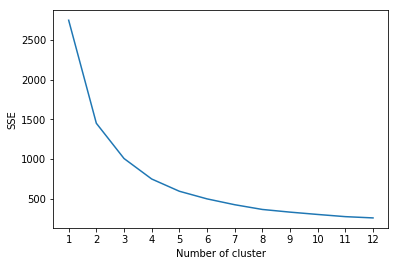

[[-0.75613282 -0.95923425 -1.04563114 -0.98264736 -0.50438673 -0.15517833
   0.27406254  0.36020076  0.39597578  0.31388659  0.44720385]
 [ 0.72552773  0.9472098   1.15866301  1.11395926 -0.14605229 -0.52032002
  -0.93703406 -0.91254249 -0.92068702 -0.78899349 -0.82573404]
 [ 0.40281508  0.31127867  0.03776984  0.13092844  1.06176435  1.12576201
   1.06224312  0.98942739  0.95444341  0.95027653  0.86210855]
 [-0.99459895 -0.53248288  0.14761283 -0.37467722 -1.279854   -1.70886288
  -1.82261325 -2.06165262 -2.06111644 -2.19661914 -2.34554304]]


Clustering with 3yr and 5yr Yields


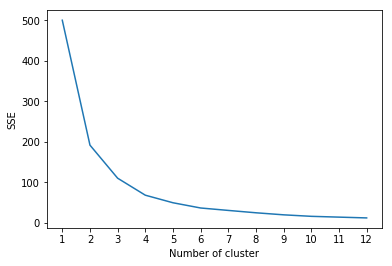

[[-0.4570043  -0.49710462]
 [ 2.01034529  1.60289789]
 [ 0.42990466  0.65321717]
 [-1.4075602  -1.59579484]]


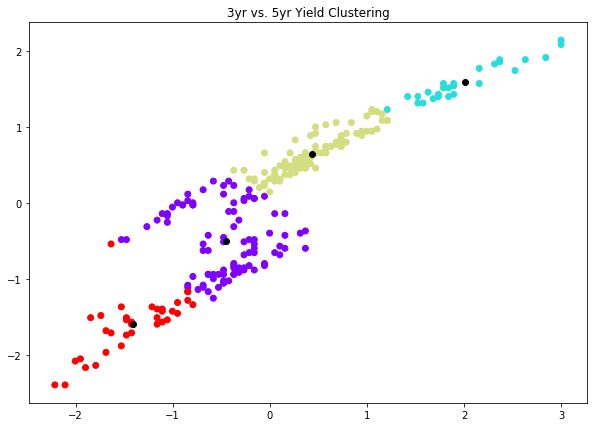

In [33]:
#Yields
sse_y = {}
for k in np.arange(1, 13, 1):
    kmeans = KMeans(n_clusters=k).fit(x_y)
    sse_y[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse_y.keys()), list(sse_y.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.xticks(np.arange(1, 13, step=1))
plt.show()
    
kmeans_y = KMeans(n_clusters=4)
kmeans_y.fit(x_y)
labels_y = kmeans_y.predict(x_y)
centroids_y = kmeans_y.cluster_centers_

print(centroids_y)

print()
print()
print('Clustering with 3yr and 5yr Yields')
sse_y = {}
for k in np.arange(1, 13, 1):
    kmeans = KMeans(n_clusters=k).fit(x_y[:,5:7])
    sse_y[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse_y.keys()), list(sse_y.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.xticks(np.arange(1, 13, step=1))
plt.show()

kmeans_y = KMeans(n_clusters=4)
kmeans_y.fit(x_y[:,5:7])
labels = kmeans_y.predict(x_y[:,5:7])
centroids_y = kmeans_y.cluster_centers_

print(centroids_y)

plt.figure(figsize=(10, 7))  
plt.scatter(x_y[:,5], x_y[:,6], c=kmeans_y.labels_, cmap='rainbow')  
plt.plot(centroids_y[0][0], centroids_y[0][1], 'or', color="black")
plt.plot(centroids_y[1][0], centroids_y[1][1], 'or', color="black")
plt.plot(centroids_y[2][0], centroids_y[2][1], 'or', color="black")
plt.plot(centroids_y[3][0], centroids_y[3][1], 'or', color="black")
plt.title('3yr vs. 5yr Yield Clustering')
plt.show()

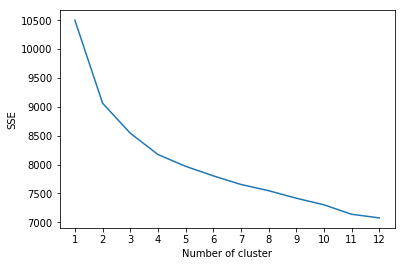

[[-1.62818561e-01 -1.70849645e-01  4.35932214e-01  1.63241675e-01
  -1.14283093e-01  2.34903489e-02 -1.02214443e-01  3.23123809e-02
   1.98164230e-01  2.63489263e-01  2.17772352e-01 -4.85801819e-02
   4.75401415e-01  2.49966010e-01  3.67334798e-01  4.62730609e-01
   4.98630811e-01  7.40747867e-02  1.02763647e-01  3.98970548e-04
   1.15398336e-01]
 [-8.96583566e-01 -3.01428371e-01 -5.02572973e-01 -3.08849451e-01
  -8.50529586e-01 -6.90884450e-01 -7.92204361e-01 -5.22870824e-01
  -4.72510944e-01 -8.55062279e-02 -5.04971528e-01 -5.80256999e-01
  -1.14685342e-01 -3.92014323e-01 -1.08718446e-01 -5.70435723e-01
  -7.53206245e-02 -4.02327589e-01 -1.94399508e-01 -3.13311566e-01
  -1.00220943e+00]
 [ 1.37528372e+00  4.71565850e-01  8.55696253e-01  7.57243210e-01
   1.41820815e+00  9.02222642e-01  1.27177258e+00  1.13084822e+00
   1.03580449e+00  2.19487216e-01  1.18168088e+00  7.75089457e-01
   1.40009401e-01  8.63525430e-01 -8.80902767e-03  6.96612077e-01
   9.81920937e-03  8.30595379e-01  1.8

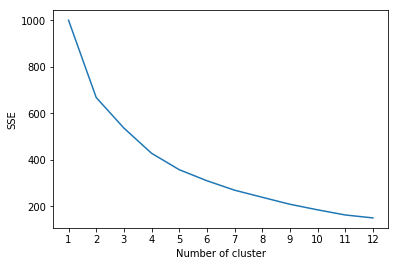

[[ 0.20888989 -0.38338462]
 [-1.21839508 -1.11153132]
 [ 0.03022432  0.86997919]
 [ 2.77831525  1.57632336]]


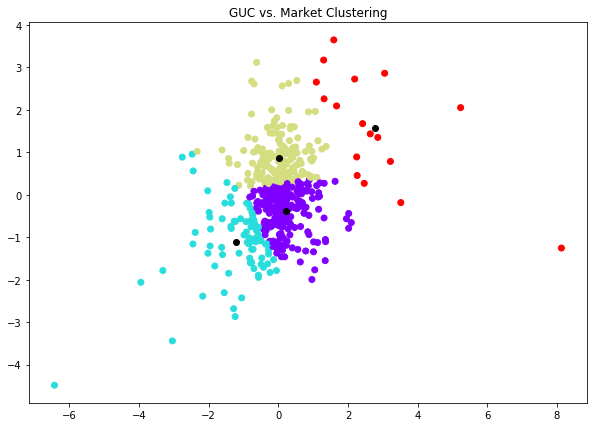

In [34]:
#Returns
sse_r = {}
for k in np.arange(1, 13, 1):
    kmeans = KMeans(n_clusters=k).fit(x_r)
    sse_r[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse_r.keys()), list(sse_r.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.xticks(np.arange(1, 13, step=1))
plt.show()

kmeans_r = KMeans(n_clusters=4)
kmeans_r.fit(x_r)
labels_r = kmeans_r.predict(x_r)
centroids_r = kmeans_r.cluster_centers_

print(centroids_r)

print()
print()
print('Clustering with GUC and Market Returns')
sse_y = {}
for k in np.arange(1, 13, 1):
    kmeans = KMeans(n_clusters=k).fit(x_r[:,19:21])
    sse_r[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse_r.keys()), list(sse_r.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.xticks(np.arange(1, 13, step=1))
plt.show()

kmeans_r = KMeans(n_clusters=4)
kmeans_r.fit(x_r[:,19:21])
labels = kmeans_r.predict(x_r[:,19:21])
centroids_r = kmeans_r.cluster_centers_

print(centroids_r)


plt.figure(figsize=(10, 7))  
plt.scatter(x_r[:,19], x_r[:,20], c=kmeans_r.labels_, cmap='rainbow')  
plt.plot(centroids_r[0][0], centroids_r[0][1], 'or', color="black")
plt.plot(centroids_r[1][0], centroids_r[1][1], 'or', color="black")
plt.plot(centroids_r[2][0], centroids_r[2][1], 'or', color="black")
plt.plot(centroids_r[3][0], centroids_r[3][1], 'or', color="black")
plt.title('GUC vs. Market Clustering')
plt.show()

4) (2) Aggregate the items (yields or stocks) in clusters using: Hierarchical Clustering  [Show the clusters for each case.]

For both cases, I determined the number of clusers that would be best usig the dendogram. From there, I ran a hierarchical clustering model. For display purposes, I selected 2 variables from each case to show what the clustering looks like.


From the dendogram, you find the longest line without a horizontal line (or new cluster). From there, you draw a horizontal line across and the number of lines it intersects is the number of clusers to use in heirarchical clustering.

Yields: From the dendogram, it is apparent that 3 clusters would be best. For the subset of 3yr and 5yr, 3 clusters is best.

Returns: From the dendogram, it is apparent that 4 clusters would be best. For the subset of GUC and market, 3 clusters is best.

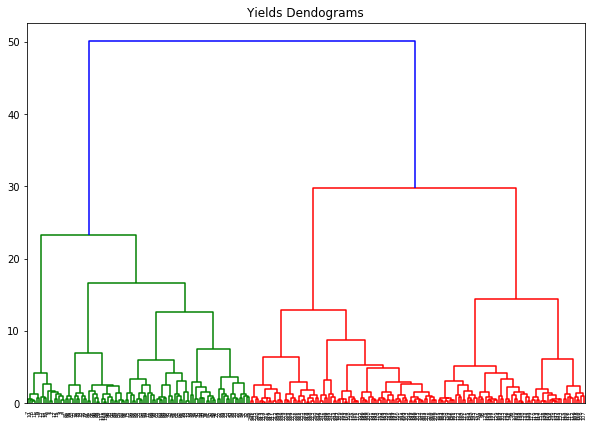

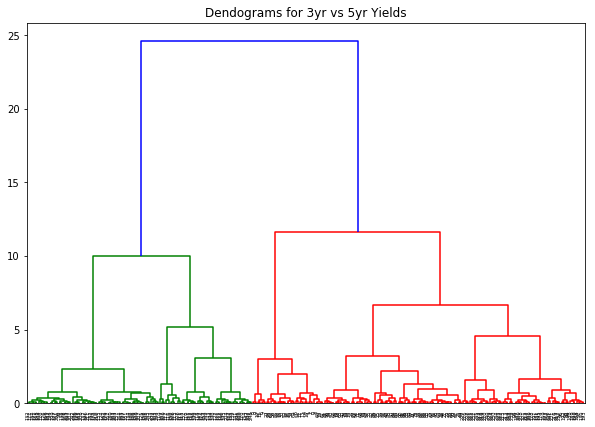

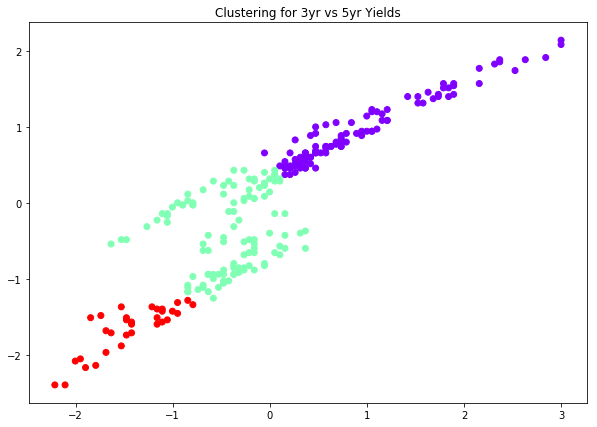

In [35]:
#Yields

plt.figure(figsize=(10, 7))  
plt.title("Yields Dendograms")  
dend_y = shc.dendrogram(shc.linkage(x_y, method='ward'))  

cluster_y = AgglomerativeClustering(n_clusters=3, linkage='ward')  
cluster_y.fit_predict(x_y)



plt.figure(figsize=(10, 7))  
plt.title("Dendograms for 3yr vs 5yr Yields")
dend_y = shc.dendrogram(shc.linkage(x_y[:, 5:7], method='ward'))  

cluster_y = AgglomerativeClustering(n_clusters=3, linkage='ward')  
cluster_y.fit_predict(x_y[:, 5:7])

plt.figure(figsize=(10, 7))  
plt.scatter(x_y[:,5], x_y[:,6], c=cluster_y.labels_, cmap='rainbow') 
plt.title("Clustering for 3yr vs 5yr Yields")
plt.show()

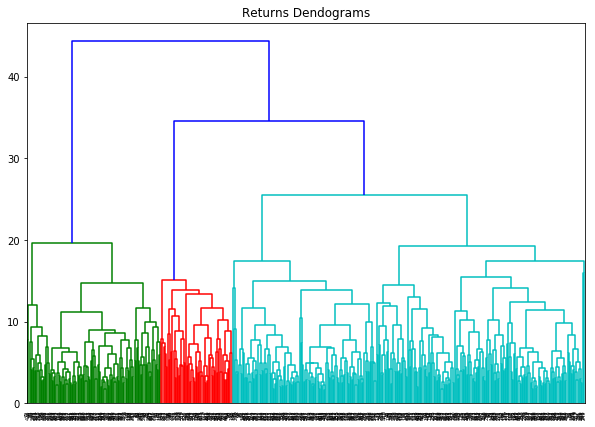

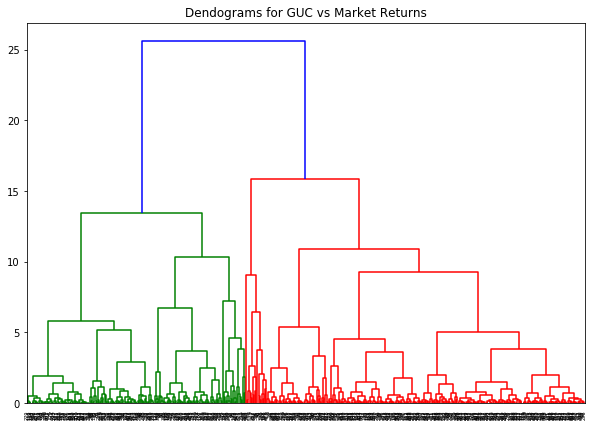

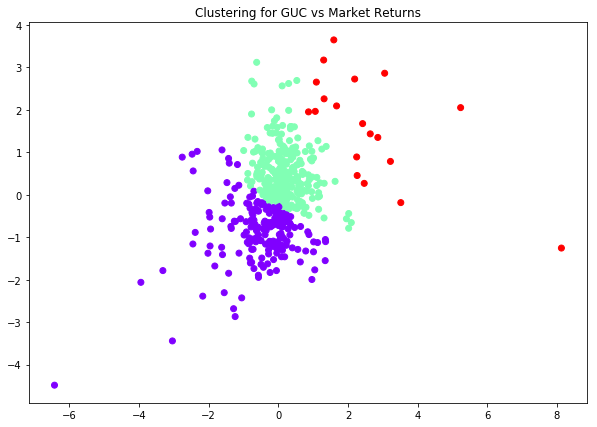

In [36]:
#Returns
plt.figure(figsize=(10, 7))  
plt.title("Returns Dendograms")  
dend_r = shc.dendrogram(shc.linkage(x_r, method='ward'))  

cluster_r = AgglomerativeClustering(n_clusters=4, linkage='ward')  
cluster_r.fit_predict(x_r)



plt.figure(figsize=(10, 7))  
plt.title("Dendograms for GUC vs Market Returns")
dend_r = shc.dendrogram(shc.linkage(x_r[:, 19:21], method='ward'))  

cluster_r = AgglomerativeClustering(n_clusters=3, linkage='ward')  
cluster_r.fit_predict(x_r[:, 19:21])

plt.figure(figsize=(10, 7))  
plt.scatter(x_r[:,19], x_r[:,20], c=cluster_r.labels_, cmap='rainbow') 
plt.title("Clustering for GUC vs Market Returns")
plt.show()

5) Briefly discuss the difference of results for both datasets.

For principal component analysis, it took very few components for the yields data to reach the 95% variability mark. However, the returns data needed much more components, all the way up to 18. You can observe this in the scree plots, where the returns data has a much more gradual slope versus the steep slope of the yields data.

For k-means clustering, the SSE vs. Number of Clusters led me to the conclusion of 4 clusters for both datasets, although they may have seemed different in nature. 

Lastly, for the hierarchical clustering, the yields dataset had an optimal number of clusters at 3 according to the dendogram, while the returns data had an optimal number of 4.

Although the contents of the datasets were very different, you can observe that there were both similarities and differences between the two when it comes to PCA and clustering.